# Introduction to Cross-Validation - Lab

## Introduction

In this lab, you'll be able to practice your cross-validation skills!


## Objectives

You will be able to:

- Perform cross validation on a model to determine optimal model performance
- Compare training and testing errors to determine if model is over or underfitting

## Let's get started

We included the code to pre-process below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

### Train-test split

Perform a train-test split with a test set of 20%.

In [2]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline



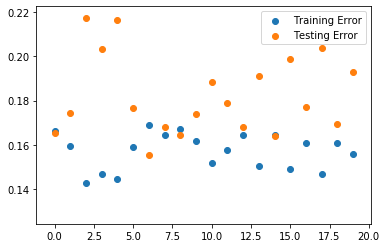

In [3]:
# Split the data into training and test sets (assign 20% to test set)
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [4]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))


978 482 978 482


### Fit the model

Fit a linear regression model and apply the model to make predictions on test set

In [ ]:
# Your code here

### Residuals and MSE

Calculate the residuals and the mean squared error on the test set

In [ ]:
# Your code here

## Cross-Validation: let's build it from scratch!

### Create a cross-validation function

Write a function `kfolds()` that splits a dataset into k evenly sized pieces. If the full dataset is not divisible by k, make the first few folds one larger then later ones.

We want the folds to be a list of subsets of data!

In [ ]:
def kfolds(data, k):
    # Force data as pandas DataFrame
    
    # add 1 to fold size to account for leftovers           
    return None

### Apply it to the Ames Housing data

In [ ]:
# Make sure to concatenate the data again
ames_data = None

In [ ]:
# Apply kfolds() to ames_data with 5 folds


### Perform a linear regression for each fold and calculate the training and test error

Perform linear regression on each and calculate the training and test error: 

In [ ]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = None
    test = None
    # Fit a linear regression model
    
    # Evaluate Train and Test errors

# print(train_errs)
# print(test_errs)

## Cross-Validation using Scikit-Learn

This was a bit of work! Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.

In [ ]:
# Your code here

Next, calculate the mean of the MSE over the 5 cross-validation and compare and contrast with the result from the train-test split case.

In [ ]:
# Your code here

##  Summary 

Congratulations! You are now familiar with cross-validation and know how to use `cross_val_score()`. Remember that the results obtained from cross-validation are robust and always use it whenever possible! 